In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np 
from numpy import dot
from numpy.linalg import norm

In [3]:
file_name = 'processed_data/aggregated_data_with_cat.csv'

In [6]:
data_df=pd.read_csv(file_name)
data_df = data_df.dropna()
data_df["title_content"] = data_df["title"] + ' '+ data_df["content"]

data_df.head(7)


,title,content,url,date,category,file_name,language,covid,health,political,...,economic,general,education,lifestyle,business,tech,auto,entertainment,arts,title_content
0,"Daily Covid-19 cases count hits 1,273 today","The Health Ministry says that another 1,273 pe...",http://www.adaderana.lk/news/80703/daily-covid...,2022-02-19,"covid, health",data/valid_records/Tharusha_64.json,en,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Daily Covid-19 cases count hits 1,273 today Th..."
1,இந்தியாவுக்கு விரைவில் வருகை தரும் இலங்கை நிதி...,"இலங்கை நிதி அமைச்சர் பஷில் ராஜபக்ஷ, இந்தியாவிற...",https://www.bbc.com/tamil/topics/cz74k7p3qw7t,2022-02-23,political,data/valid_records/Kajaani_tamil_124.json,ta,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,இந்தியாவுக்கு விரைவில் வருகை தரும் இலங்கை நிதி...
2,Met. Dept. issues advisory for severe lightning,Thundershowers accompanied by severe lightning...,http://www.adaderana.lk/news/80850/met-dept-is...,2022-02-26,weather,data/valid_records/Yathursiya_en_117.json,en,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Met. Dept. issues advisory for severe lightnin...
3,யாழிலிருந்து முல்லைத்தீவு சென்று தாக்குதல் மேற...,யாழ்ப்பாணத்திலிருந்து முல்லைத்தீவு – அலம்பில் ...,https://www.newsfirst.lk/tamil/2022/02/22/%e0%...,2022-02-22,"crime,legal",data/valid_records/Kajaani_tamil_42.json,ta,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,யாழிலிருந்து முல்லைத்தீவு சென்று தாக்குதல் மேற...
4,இந்திய அணிக்கு 184 ஓட்டங்கள் வெற்றி இலக்கு,இந்தியா மற்றும் இலங்கை அணிகளுக்கிடையிலான இரண்ட...,https://www.hirunews.lk/sooriyanfmnews/298140/...,2022-02-26,sports,data/valid_records/Yathursiya_tamil_124.json,ta,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,இந்திய அணிக்கு 184 ஓட்டங்கள் வெற்றி இலக்கு இந்...
5,Wanindu Hasaranga : SLC official update,"Wanindu Hasaranga, who was in isolation after ...",https://www.cricwire.lk/2022/02/23/wanindu-has...,2022-02-23,"sports,covid",data/valid_records/Kajaani_eng_71.json,en,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wanindu Hasaranga : SLC official update Wanind...
6,தேசிய பணம் அனுப்பும் மொபைல் செயலியான 'லங்கா ரெ...,நாட்டிற்கு உள்நோக்கி பணம் அனுப்புவதற்கு வசதியா...,http://tamil.adaderana.lk/news.php?nid=157761,2021-02-21,economic,data/valid_records/Yathursiya_tamil_65.json,ta,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,தேசிய பணம் அனுப்பும் மொபைல் செயலியான 'லங்கா ரெ...


In [65]:
content_column = "title"

In [66]:
import re as re
import nltk
from nltk.corpus import stopwords

def clean(text):
    text = text.str.lower()
    # text = text.map(lambda x: re.sub('\\n',' ',str(x)))
    # text = text.map(lambda x: re.sub("\[\[User.*",'',str(x)))
    # text = text.map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    # text = text.map(lambda x: re.sub("\(http://.*?\s\(http://.*\)",'',str(x)))
    return text

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '\xa0', '\t',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '\u3000', '\u202f',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '«',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

updated_puncts = ['\\u200b', '\\u200d', '\\u200'] 

mispell_dict = {"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"couldnt" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"doesnt" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"havent" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"shouldnt" : "should not",
"that's" : "that is",
"thats" : "that is",
"there's" : "there is",
"theres" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"theyre":  "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"}


def clean_text(x):
    x = str(x).replace("\n","")
    for punct in puncts:
        x = x.replace(punct, f' {punct} ')
    return x

    
def remove_stop_words(text):
    tokens = nltk.word_tokenize(text)
        # 2. check if stopword
    tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
    text = " ".join(tokens)
    return text

In [22]:
# nltk.download('punkt')
# nltk.download()

import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vithulanv/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [67]:
data_df[content_column] = clean(data_df[content_column])
data_df[content_column] = data_df[content_column].apply(lambda x: clean_text(x))
data_df[content_column] = data_df[content_column].apply(lambda x: remove_stop_words(x))

In [68]:
data_df[content_column][0]

'daily covid - 19 cases count hits 1 , 273 today'

In [69]:
data_df[content_column][1]

'இந்தியாவுக்கு விரைவில் வருகை தரும் இலங்கை நிதி அமைச்சர் பஷில் ராஜபக்'

In [70]:
data_df[content_column][5]

'wanindu hasaranga : slc official update'

In [12]:
# vectorizer = TfidfVectorizer()
# vectors = vectorizer.fit_transform(data_df[content_column])
# feature_names = vectorizer.get_feature_names()
# dense = vectors.todense()
# denselist = dense.tolist()
# df = pd.DataFrame(denselist, columns=feature_names)

/Users/vithulanv/virtualenvs/ds_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [86]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(data_df[content_column])

In [87]:
vec_arr = X.toarray()

In [88]:
type(vec_arr)

numpy.ndarray

In [89]:
data_df['vectors'] = vec_arr.tolist()

In [90]:
data_df.head(50)

,title,content,url,date,category,file_name,language,covid,health,political,...,general,education,lifestyle,business,tech,auto,entertainment,arts,title_content,vectors
0,"daily covid - 19 cases count hits 1 , 273 today","The Health Ministry says that another 1,273 pe...",http://www.adaderana.lk/news/80703/daily-covid...,2022-02-19,"covid, health",data/valid_records/Tharusha_64.json,en,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"daily covid - 19 cases count hits 1 , 273 toda...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.363..."
1,இந்தியாவுக்கு விரைவில் வருகை தரும் இலங்கை நிதி...,"இலங்கை நிதி அமைச்சர் பஷில் ராஜபக்ஷ, இந்தியாவிற...",https://www.bbc.com/tamil/topics/cz74k7p3qw7t,2022-02-23,political,data/valid_records/Kajaani_tamil_124.json,ta,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,இந்தியாவுக்கு விரைவில் வருகை தரும் இலங்கை நிதி...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,met . dept . issues advisory severe lightning,Thundershowers accompanied by severe lightning...,http://www.adaderana.lk/news/80850/met-dept-is...,2022-02-26,weather,data/valid_records/Yathursiya_en_117.json,en,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,met . dept . issues advisory severe lightning ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,யாழிலிருந்து முல்லைத்தீவு சென்று தாக்குதல் மேற...,யாழ்ப்பாணத்திலிருந்து முல்லைத்தீவு – அலம்பில் ...,https://www.newsfirst.lk/tamil/2022/02/22/%e0%...,2022-02-22,"crime,legal",data/valid_records/Kajaani_tamil_42.json,ta,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,யாழிலிருந்து முல்லைத்தீவு சென்று தாக்குதல் மேற...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,இந்திய அணிக்கு 184 ஓட்டங்கள் வெற்றி இலக்கு,இந்தியா மற்றும் இலங்கை அணிகளுக்கிடையிலான இரண்ட...,https://www.hirunews.lk/sooriyanfmnews/298140/...,2022-02-26,sports,data/valid_records/Yathursiya_tamil_124.json,ta,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,இந்திய அணிக்கு 184 ஓட்டங்கள் வெற்றி இலக்கு இந்...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,wanindu hasaranga : slc official update,"Wanindu Hasaranga, who was in isolation after ...",https://www.cricwire.lk/2022/02/23/wanindu-has...,2022-02-23,"sports,covid",data/valid_records/Kajaani_eng_71.json,en,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wanindu hasaranga : slc official update wanind...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,தேசிய பணம் அனுப்பும் மொபைல் செயலியான ' லங்கா ர...,நாட்டிற்கு உள்நோக்கி பணம் அனுப்புவதற்கு வசதியா...,http://tamil.adaderana.lk/news.php?nid=157761,2021-02-21,economic,data/valid_records/Yathursiya_tamil_65.json,ta,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,தேசிய பணம் அனுப்பும் மொபைல் செயலியான ' லங்கா ர...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,enjoining order preventing nursing trade union...,The Colombo District Court today further exten...,https://www.dailymirror.lk/latest_news/Enjoini...,2022-02-25,legal,data/valid_records/Tharusha_217.json,en,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,enjoining order preventing nursing trade union...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,ප්‍රදේශ කිහිපයකට තරමක තද වැසි,"නැගෙනහිර සහ ඌව පළාත්වලත් පොළොන්නරුව, මාතලේ සහ ...",http://sinhala.adaderana.lk/news/164631/%E0%B6...,2022-02-27,weather,data/valid_records/Yathursiya_sin_29.json,si,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ප්‍රදේශ කිහිපයකට තරමක තද වැසි නැගෙනහිර සහ ඌව ප...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,pakistan names 88 suspects priyantha kumara ki...,Police in Sialkot have submitted a challan to ...,https://ceylontoday.lk/news/pakistan-names-88-...,2022-02-27,crime,data/valid_records/Kajaani_eng_162.json,en,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pakistan names 88 suspects priyantha kumara ki...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [38]:
def get_similarity(a, b):
  return dot(a, b)/(norm(a)*norm(b))

def get_mean(a, b):
  return np.array([a,b]).mean(axis=0)

In [93]:
get_similarity(vec_arr[1], vec_arr[60])

0.17567081404539886

In [51]:
valid_categories = ['general', 'crime', 'political', 'business', 'economic', 'sports', 'arts', 'entertainment',
                    'education', 'tech', 'auto', 'legal', 'lifestyle', 'health', 'covid', 'weather']

In [49]:
def get_doc_clusters(df, threshold):
  clusters_df = []
  print(threshold)
  for index, row in df.iterrows():
    if index == 0:
      clusters_df.append({'centroid': row['vectors'],'cluster_df': row.to_frame().T})
      continue

    cluster_id = 0
    cos_sim_max = 0
    i = 0
    for cluster in clusters_df:
      cos_sim = get_similarity(cluster['centroid'], row['vectors'])
      if cos_sim >= cos_sim_max:
        cos_sim_max = cos_sim
        cluster_id = i
      i = i + 1

    if cos_sim_max >= threshold:      
      clusters_df[cluster_id]['cluster_df'] = clusters_df[cluster_id]['cluster_df'].append(row.to_frame().T, ignore_index=True)
      new_centroid = get_mean(clusters_df[cluster_id]['centroid'], row['vectors'])
      clusters_df[cluster_id]['centroid'] = new_centroid
    else:
      clusters_df.append({'centroid': row['vectors'],'cluster_df': row.to_frame().T})

  return clusters_df
  
def calculate_accuracy(clusters_dataframe):
  accuracy_arr = []
  min = None
  max = None
  one_doc_cls_count = 0

  for cluster in clusters_dataframe:
    clust_acc_dict = {"max": {"category": None, "accuracy": 0}}
    length = cluster["cluster_df"].shape[0]
    cls_df = cluster["cluster_df"]

    if min is None or max is None:
      min = length
      max = length
    
    if length < min: 
      min = length
    
    if length > max:
      max = length

    if length == 1:
      one_doc_cls_count = one_doc_cls_count + 1

    for cat in valid_categories:
      cat_count = cls_df[cat].sum()
      accuracy = cat_count/length
      clust_acc_dict[cat] = {"category": cat, "accuracy": accuracy}
      if accuracy > clust_acc_dict['max']['accuracy']:
        clust_acc_dict['max'] = {"category": cat, "accuracy": accuracy}

    accuracy_arr.append(clust_acc_dict)

  total_acc = 0
  for acc in accuracy_arr:
    # print(acc['max'])
    total_acc = total_acc + acc['max']['accuracy']

  avg_acc = total_acc/len(accuracy_arr)

  # Average accuracy, cluster-wise accuracy, min doc count, max doc count, one doc cluster count
  return avg_acc, accuracy_arr, min, max, one_doc_cls_count

In [94]:
start = 0.1
stop = 0.5
steps = 0.1
threshold_range = np.arange(start,stop,steps)
acc_arr = []

for threshold in threshold_range:
  clusters_df_arr = get_doc_clusters(data_df, threshold)
  accuracy, acc_collection, min, max, one_doc_cls_count = calculate_accuracy(clusters_df_arr)

  clusters_count = len(clusters_df_arr)


  acc_arr.append({'threshold': threshold, 'accuracy': accuracy, 'collection': acc_collection, 'clusters_count': clusters_count, 
                  'min_count': min, 'max_count': max, 'one_doc_clus': one_doc_cls_count, 
                  'single_doc_cls_prct': one_doc_cls_count/clusters_count, 'avg_doc_count': 1604/clusters_count})

0.1


/var/folders/sg/hkn4yl390p7g_66xl9d2db5c0000gp/T/ipykernel_47640/926143693.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return dot(a, b)/(norm(a)*norm(b))


0.2
0.30000000000000004
0.4


In [103]:
for cluster_item in clusters_df_arr:
    clus_df = cluster_item['cluster_df']
    lan_len = len(clus_df.groupby('language').size())
    if lan_len != 1:
        print('Multilingual cluster')
        print(cluster_item['cluster_df']['title'])
        print('\n')

Multilingual cluster
0                  කසළ බහාලුම් 45 ක් ප්‍රතිඅපනයනය කෙරේ
1                 45 அடி ஆழமான குழியில் விழுந்த பெண் .
2    මෙරටට ගෙනා කසළ තොගයේ අවසන් බහාලුම් 45 අද ප්‍රත...
Name: title, dtype: object


Multilingual cluster
0                       පාර්ලිමේන්තුව අද ( 22 ) රැස්වේ
1    எல்லை தாண்டி மீன்பிடித்த இந்திய மீனவர்கள் 22 ப...
2              22 % quality drop observed – jayasumana
3           22 இந்திய மீனவர்கள் பருத்தித்துறையில் கைது
4                            parliament meet 22 25 feb
Name: title, dtype: object


Multilingual cluster
0    பெட்ரோலிய கூட்டுத்தாபனத்திற்கு 11 மில்லியன் ரூ...
1    11 constituent parties govt launch new initiative
2                 dimuth reveals sl playing 11 details
Name: title, dtype: object


Multilingual cluster
0              போலி pcr அறிக்கைகளை தயாரித்த மூவர் கைது
1                   post - mortem pcr mandatory deaths
2      சுற்றுலாப் பயணிகளுக்கான pcr தொடர்பான அறிவித்தல்
3    fully vaccinated travellers exempted pre - dep...
Name

In [96]:
acc_arr

[{'threshold': 0.1,
  'accuracy': 0.7138529417386033,
  'collection': [{'max': {'category': 'covid',
     'accuracy': 0.40425531914893614},
    'general': {'category': 'general', 'accuracy': 0.14893617021276595},
    'crime': {'category': 'crime', 'accuracy': 0.0},
    'political': {'category': 'political', 'accuracy': 0.0851063829787234},
    'business': {'category': 'business', 'accuracy': 0.02127659574468085},
    'economic': {'category': 'economic', 'accuracy': 0.14893617021276595},
    'sports': {'category': 'sports', 'accuracy': 0.2127659574468085},
    'arts': {'category': 'arts', 'accuracy': 0.0},
    'entertainment': {'category': 'entertainment', 'accuracy': 0.0},
    'education': {'category': 'education', 'accuracy': 0.02127659574468085},
    'tech': {'category': 'tech', 'accuracy': 0.0},
    'auto': {'category': 'auto', 'accuracy': 0.0},
    'legal': {'category': 'legal', 'accuracy': 0.0},
    'lifestyle': {'category': 'lifestyle', 'accuracy': 0.02127659574468085},
    'heal

In [97]:
results_df = pd.DataFrame(acc_arr)
results_df.head(10)

,threshold,accuracy,collection,clusters_count,min_count,max_count,one_doc_clus,single_doc_cls_prct,avg_doc_count
0,0.1,0.713853,"[{'max': {'category': 'covid', 'accuracy': 0.4...",200,1,47,81,0.405000,8.020000
1,0.2,0.704729,"[{'max': {'category': 'covid', 'accuracy': 0.3...",247,1,37,83,0.336032,6.493927
2,0.3,0.736880,"[{'max': {'category': 'covid', 'accuracy': 0.9...",335,1,33,107,0.319403,4.788060
3,0.4,0.811064,"[{'max': {'category': 'covid', 'accuracy': 0.9...",492,1,29,199,0.404472,3.260163


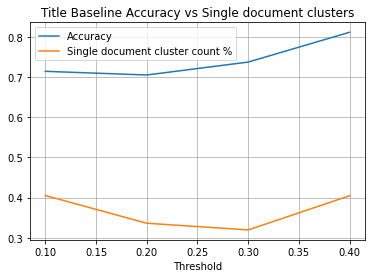

In [105]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.plot(results_df['threshold'].tolist(), results_df['accuracy'].tolist(), label = "Accuracy")
plt.plot(results_df['threshold'].tolist(), results_df['single_doc_cls_prct'].tolist(), label = "Single document cluster count %")

plt.xlabel("Threshold")

plt.title('Title Baseline Accuracy vs Single document clusters')
plt.grid()

plt.legend()
plt.show()

In [104]:
results_df.to_csv('baseline_results_title.csv', index=False)